## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 2. Load Dataset

In [2]:
file_path = 'C:/Users/Fatlem/Desktop/Data-Mining/Fatlem-Rep2/automobileEDA.csv'
df = pd.read_csv(file_path)

> Memuat dataset dari file CSV yang berlokasi di file_path dan menyimpannya dalam DataFrame bernama df.

## 3. Exploratory Data Analysis (EDA)

In [30]:
# Handle missing values by replacing '?' with NaN and converting to appropriate types
df.replace('?', np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop rows with missing price or horsepower
df.dropna(subset=['price', 'horsepower'], inplace=True)

- Menggantikan nilai '?' dengan NaN dan mengonversi kolom price dan horsepower menjadi tipe numerik. Nilai yang tidak bisa dikonversi menjadi NaN.
- Menghapus baris dengan nilai yang hilang pada kolom price atau horsepower.

In [31]:
# Display basic statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
        symboling  normalized-losses  wheel-base      length       width  \
count  201.000000          201.00000  201.000000  201.000000  201.000000   
mean     0.840796          122.00000   98.797015    0.837102    0.915126   
std      1.254802           31.99625    6.066366    0.059213    0.029187   
min     -2.000000           65.00000   86.600000    0.678039    0.837500   
25%      0.000000          101.00000   94.500000    0.801538    0.890278   
50%      1.000000          122.00000   97.000000    0.832292    0.909722   
75%      2.000000          137.00000  102.400000    0.881788    0.925000   
max      3.000000          256.00000  120.900000    1.000000    1.000000   

           height  curb-weight  engine-size        bore      stroke  \
count  201.000000   201.000000   201.000000  201.000000  197.000000   
mean    53.766667  2555.666667   126.875622    3.330692    3.256904   
std      2.447822   517.296727    41.546834    0.268072    0.319256   
min     47.80

> Menampilkan statistik dasar dari dataset seperti mean, standard deviation, minimum, dan maximum untuk kolom numerik.

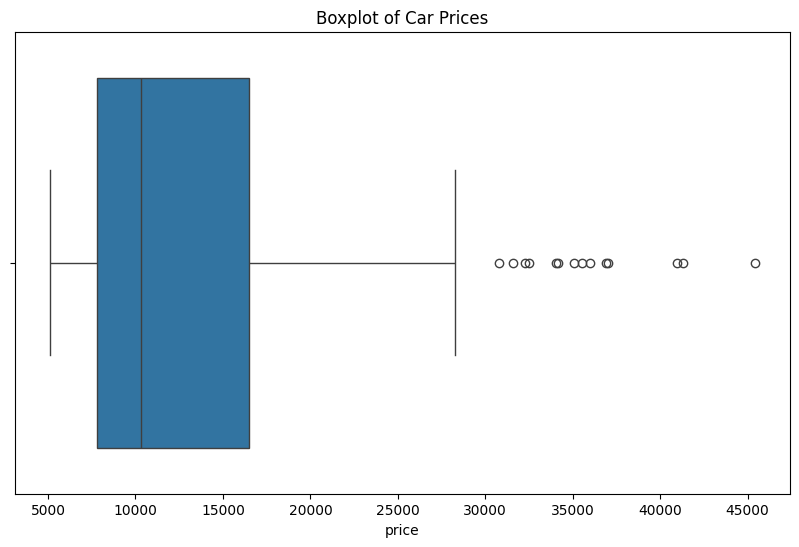

In [32]:
# Detect outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.show()

> Menampilkan boxplot untuk mendeteksi outlier pada kolom price.

## 4. Correlation Analysis

In [18]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

In [19]:
# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

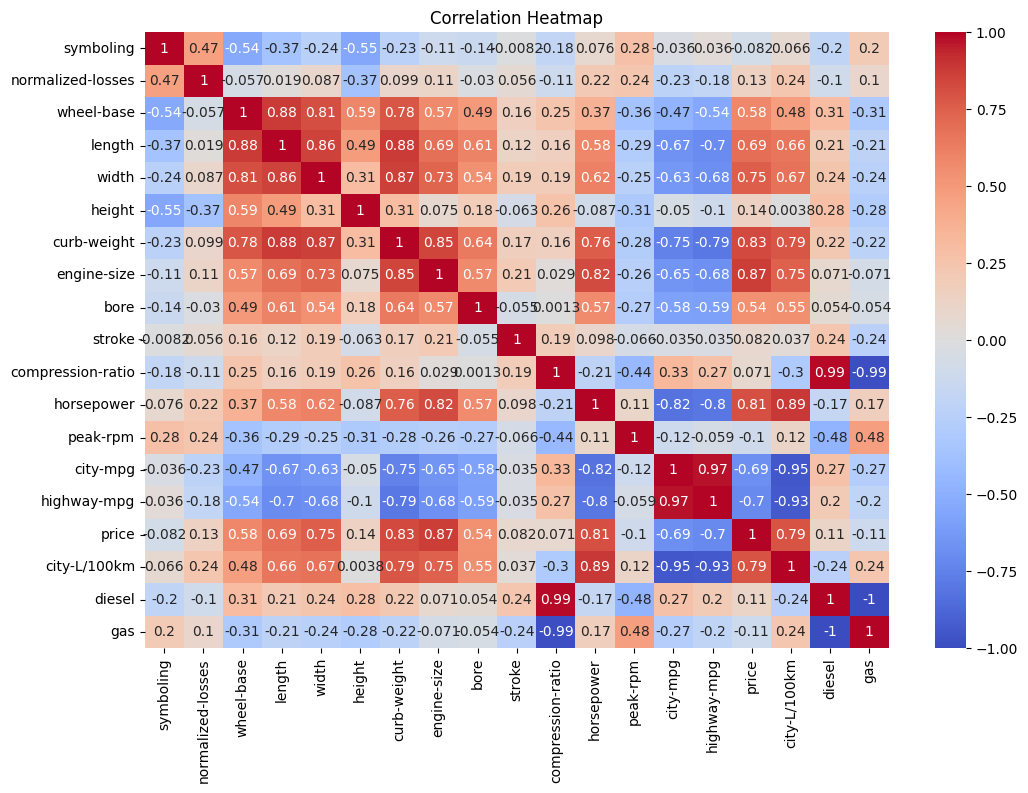

In [20]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Memilih hanya kolom numerik untuk menghitung matriks korelasi.
- Menggunakan heatmap untuk memvisualisasikan korelasi antara fitur numerik dalam dataset. Semakin tinggi nilai korelasi, semakin kuat hubungan antar fitur.

## 5. Predicting Car Price Using Linear Regression

In [21]:
# Select features and target variable
features = ['horsepower', 'length', 'width', 'curb-weight', 'engine-size']
X = df[features]
y = df['price']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Memilih kolom yang akan digunakan sebagai fitur (X) dan target (y). Fitur yang dipilih adalah horsepower, length, width, curb-weight, dan engine-size.
- Membagi data menjadi set pelatihan (80%) dan set pengujian (20%) dengan train_test_split.

In [23]:
# Create linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

- Membuat model regresi linier dan melatihnya menggunakan data pelatihan (X_train dan y_train).
- Menggunakan model yang sudah dilatih untuk membuat prediksi terhadap set pengujian (X_test).

## 6. Evaluate the Model

In [25]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 3753.054874615439
Root Mean Squared Error (RMSE): 5369.438476423806
R-squared: 0.7643512057926132


- Menghitung metrik evaluasi model:
>- MAE (Mean Absolute Error): Rata-rata kesalahan absolut antara nilai aktual dan prediksi.
>- RMSE (Root Mean Squared Error): Akar dari rata-rata kesalahan kuadrat, memberikan gambaran seberapa jauh prediksi dari nilai aktual.
>- R-squared: Mengukur seberapa baik model cocok dengan data (semakin mendekati 1, semakin baik).

## 7. Visualizing Actual vs. Predicted Prices

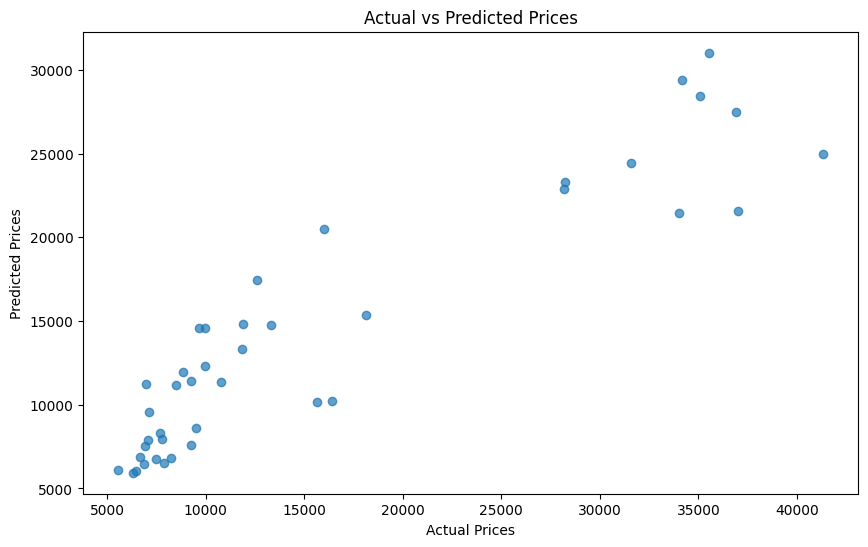

In [27]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

> Membuat scatter plot untuk membandingkan harga aktual dengan harga yang diprediksi oleh model. Ini membantu mengevaluasi seberapa baik model melakukan prediksi.